# 문자를 읽을 수 있는 딥러닝
# 다양한 OCR모델 비교하기
- Google OCR API
- keras-ocr
- Tesseract   

어떤 모듈을 도입하면 좋을지 기술 검증 해보기

## Step1. 검증용 데이터셋 준비

In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import keras_ocr

import matplotlib.image as img
%matplotlib inline

In [38]:
# 이미지 불러오기 - 나열
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test/'
images_path = glob(work_dir+'/*')
images_path.sort()
images_path

['/home/aiffel/aiffel/ocr_python/test/01.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/02.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/03.png',
 '/home/aiffel/aiffel/ocr_python/test/04.jpg',
 '/home/aiffel/aiffel/ocr_python/test/05.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/06.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/07.jpg',
 '/home/aiffel/aiffel/ocr_python/test/08.jpg',
 '/home/aiffel/aiffel/ocr_python/test/09.jpg',
 '/home/aiffel/aiffel/ocr_python/test/10.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/11.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/12.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/13.png',
 '/home/aiffel/aiffel/ocr_python/test/14.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/15.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/16.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/17.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/18.jpg',
 '/home/aiffel/aiffel/ocr_python/test/19.jpeg',
 '/home/aiffel/aiffel/ocr_python/test/20.jpg']

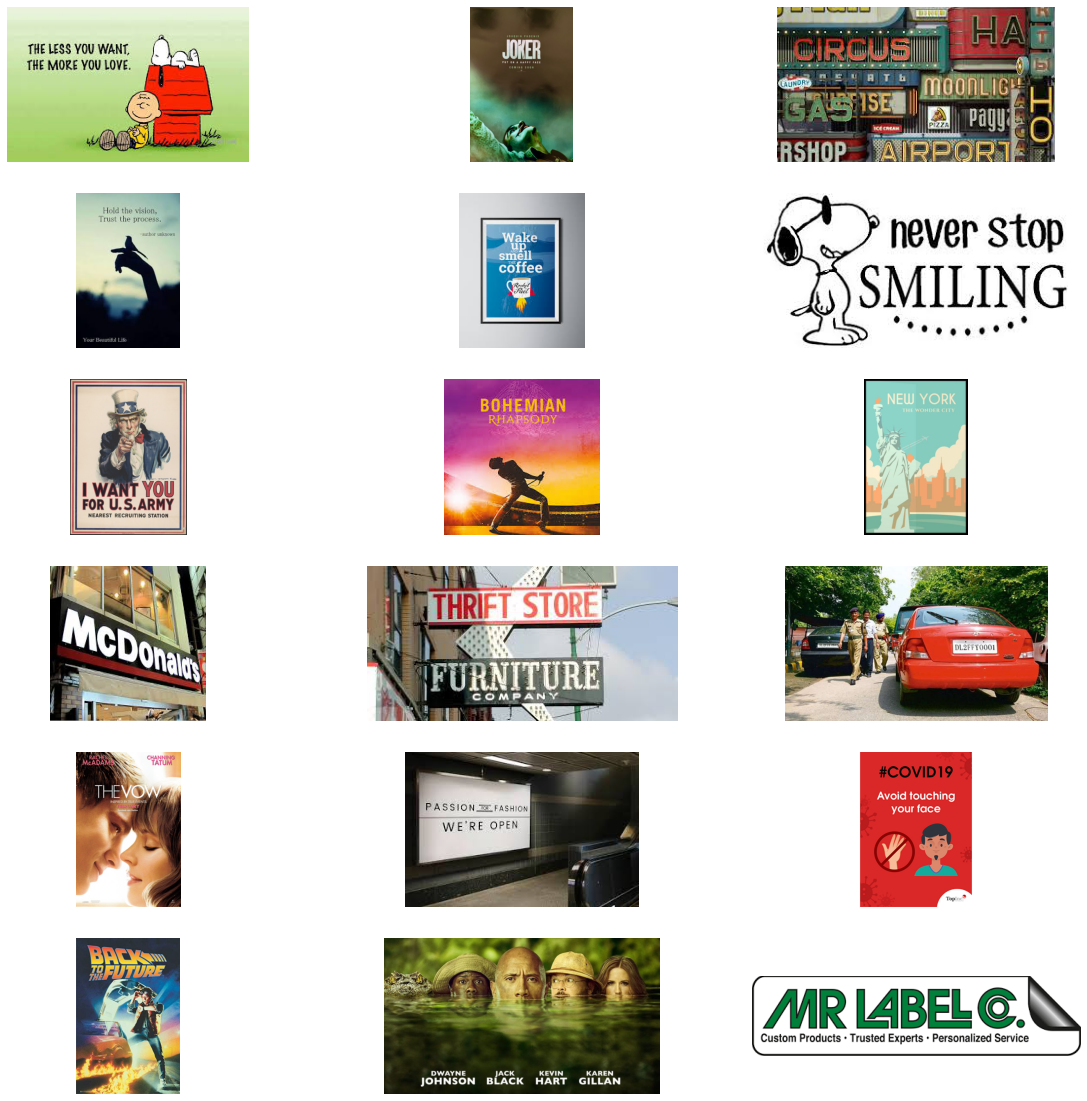

In [41]:
# 이미지 살펴보기
plt.figure(figsize=(20,20))

for idx, im in enumerate(images_path):
    plt.subplot(6, 3, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## 모델 비교하기
## (1) Google OCR API

In [10]:
! export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json

In [11]:
def Google_OCR(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [37]:
for img in images:
    Google_OCR(img)

Texts:

"Wake
up
smell
cöffee
Reokel
Fuel
"

"Wake"

"up"

"smell"

"cöffee"

"Reokel"

"Fuel"
bounds: (84,153),(112,154),(112,164),(84,163)
Texts:

"NEW YORK
THE WONDER CITY
"

"NEW"

"YORK"

"THE"

"WONDER"

"CITY"
bounds: (449,170),(522,170),(522,190),(449,190)
Texts:

"#COVID19
Avoid touching
your face
TopIne
"

"#COVID19"

"Avoid"

"touching"

"your"

"face"

"TopIne"
bounds: (274,371),(317,371),(317,387),(274,387)
Texts:

"JA IES ITCOIERY FLAGE
I WANT YOU
FOR U.S.ARMY
NEAREST RECRUITING STATION
COTRIOHT, 1917 LESUE-JUDGE CO,NY.
"

"JA"

"IES"

"ITCOIERY"

"FLAGE"

"I"

"WANT"

"YOU"

"FOR"

"U.S.ARMY"

"NEAREST"

"RECRUITING"

"STATION"

"COTRIOHT,"

"1917"

"LESUE-JUDGE"

"CO,NY."
bounds: (639,1573),(661,1573),(661,1581),(639,1581)
Texts:

"ВОНЕМIAN
RHAPSODY
"

"ВОНЕМIAN"

"RHAPSODY"
bounds: (65,50),(162,49),(162,66),(65,67)
Texts:

"JOAQUIN PHOENIX
JOKER
PUT ON A HAPPY FACE
COMING SO0ON
"

"JOAQUIN"

"PHOENIX"

"JOKER"

"PUT"

"ON"

"A"

"HAPPY"

"FACE"

"COMING"

"SO0ON"
bound

## (2) keras-ocr 

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


In [30]:
images_keras_ocr = [keras_ocr.tools.read(img) for img in images_path]

In [31]:
prediction_groups = [pipeline.recognize([img]) for img in images_path]

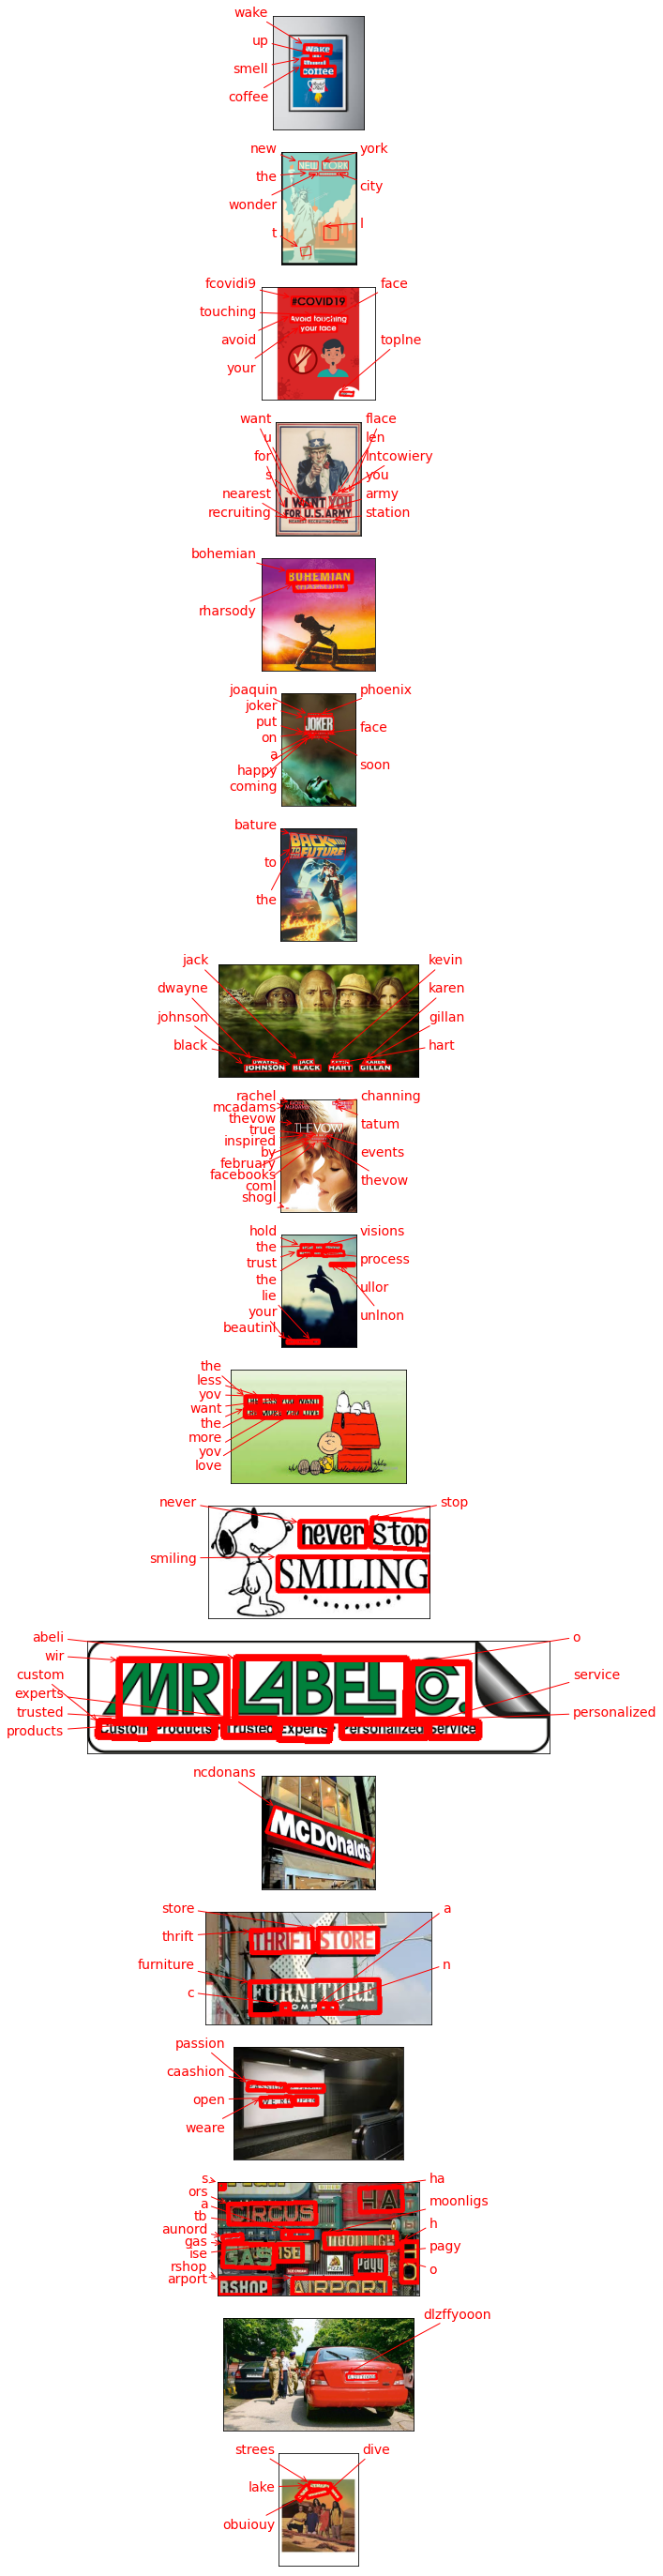

In [36]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images_keras_ocr), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras_ocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

<AxesSubplot:>

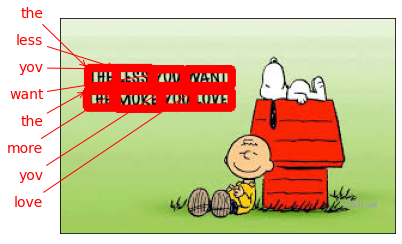

In [43]:
image_11_path = glob(work_dir+'11.jpeg')
image_11 = plt.imread(image_11_path[0]) 

images_keras_ocr11 = [keras_ocr.tools.read(im) for im in image_11_path]

prediction11 = pipeline.recognize([image_11_path[0]])

keras_ocr.tools.drawAnnotations(image=images_keras_ocr11[0], predictions=prediction11[0])

In [17]:
image_16_path = glob(work_dir+'16.jpeg')
image_16 = plt.imread(image_16_path[0]) 

images_keras_ocr16 = [keras_ocr.tools.read(im) for im in image_16_path]

prediction16 = pipeline.recognize([image_16_path[0]])

<AxesSubplot:>

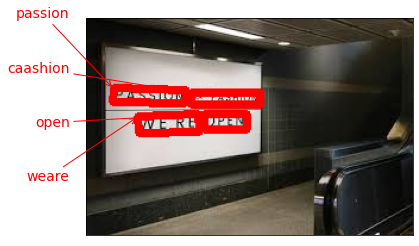

In [20]:
keras_ocr.tools.drawAnnotations(image=images_keras_ocr16[0], predictions=prediction16[0])

In [21]:
image_17_path = glob(work_dir+'17.jpeg')
image_17 = plt.imread(image_17_path[0]) 

images_keras_ocr17 = [keras_ocr.tools.read(im) for im in image_17_path]

prediction17 = pipeline.recognize([image_17_path[0]])

<AxesSubplot:>

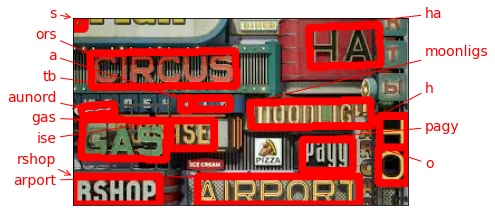

In [24]:
keras_ocr.tools.drawAnnotations(image=images_keras_ocr17[0], predictions=prediction17[0])

In [26]:
image_19_path = glob(work_dir+'19.jpeg')
image_19 = plt.imread(image_19_path[0]) 

images_keras_ocr19 = [keras_ocr.tools.read(im) for im in image_19_path]

prediction19 = pipeline.recognize([image_19_path[0]])

<AxesSubplot:>

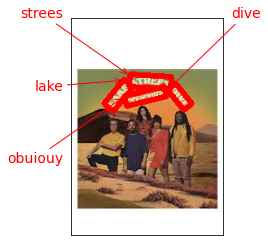

In [29]:
keras_ocr.tools.drawAnnotations(image=images_keras_ocr19[0], predictions=prediction19[0])

In [41]:
image_20_path = glob(work_dir+'20.jpg')
image_20 = plt.imread(image_20_path[0]) 

images_keras_ocr20 = [keras_ocr.tools.read(im) for im in image_20_path]

prediction20 = pipeline.recognize([image_20_path[0]])

<AxesSubplot:>

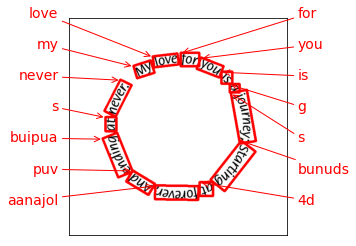

In [42]:
keras_ocr.tools.drawAnnotations(image=images_keras_ocr20[0], predictions=prediction20[0])

## (3) Tesseract

In [14]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def crop_word_regions(idx, image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
        
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [16]:
cropped_image_path_list = []
for idx, img_path in enumerate(images_path):
    cropped_image_path_list.append(crop_word_regions(idx, img_path, f"{work_dir}tesseract/{idx}"))

SystemError: tile cannot extend outside image

In [33]:
# 이미지 불러오기 - 나열
# work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
# images_path = glob(work_dir+'/*')


cropped_image_path_list = crop_word_regions(images_path, work_dir)

IsADirectoryError: [Errno 21] Is a directory: '/home/aiffel/aiffel/ocr_python/test/'